### Importa bibliotecas necessárias

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import pathlib
from IPython.display import Audio as play

#### Define uma função para calcular o espectro de frequências do sinal. Retorna a frequência e a magnitude em dB

In [78]:
# Função para calcular o espectro
def spectrum(sinal, taxa_amostragem):
    # sinal -> dados lidos do arquivo
    # taxa_amostragem -> taxa de amostragem do sinal em Hz

    N = len(sinal)
    half_N = N // 2

    freqs = np.fft.fftfreq(N, 1 / taxa_amostragem)
    freqs = freqs[:half_N]

    X = np.fft.fft(sinal)
    X_magnitude = np.abs(X)
    X_magnitude = X_magnitude[:half_N]
    X_magnitude /= np.max(X_magnitude)
    X_magnitude_db = 20 * np.log10(X_magnitude)

    return freqs, X_magnitude_db

### Implementa a convolução para aplicação do filtro

In [79]:
# Convolução
def convolve(x, h):
    y = np.zeros(len(x))
    L = len(h)
    M = L // 2
    for n in range(M, len(x) - M):
        y[n] = np.sum(x[n - M:n + M + 1] * h)
    return y

### Cria um filtro FIR passa-baixa com janela de Blackman.

In [80]:
# Função para criar filtro FIR passa-baixa
def create_fir(fc, L, fs):
    # fc -> frequência de corte em Hz
    # L -> número de coeficientes do filtro
    # fs -> taxa de amostragem do sinal em Hz

    n = np.arange(L) - (L - 1) // 2

    # Coeficientes do filtro FIR
    h = 2 * fc / fs * np.sinc(2 * fc * n / fs)

    # Calculando a janela Blackman
    blackman = 0.42 - 0.5 * np.cos(2 * np.pi * np.arange(L) / (L - 1)) + 0.08 * np.cos(4 * np.pi * np.arange(L) / (L - 1))

    # Aplicando a janela Blackman ao filtro
    h *= blackman

    # Normalizando o filtro
    h /= np.sum(h)
    
    return h

### Define o caminho para a pasta onde estão os arquivos de áudio .wav

In [81]:
# Caminho dos arquivos .wav
caminho_arquivos = pathlib.Path('../materiais')

### Leitura e plotagem do primeiro sinal de áudio

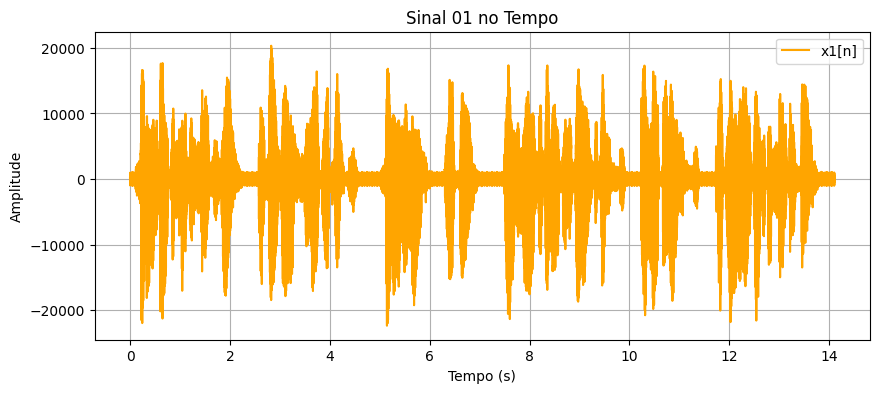

In [82]:
# Leitura do sinal 1
taxa_amostragem_1, sinal_1 = wav.read(f'{caminho_arquivos}/01.wav')

# Tempo do sinal 1
duracao1 = len(sinal_1) / taxa_amostragem_1
tempo1 = np.linspace(0, duracao1, len(sinal_1), endpoint=False)

# Plotando o sinal 1 no tempo
plt.figure(figsize=(10, 4))
plt.plot(tempo1, sinal_1, label="x1[n]", color='orange')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Sinal 01 no Tempo")
plt.legend()
plt.grid()

### Análise de frequência do primeiro sinal


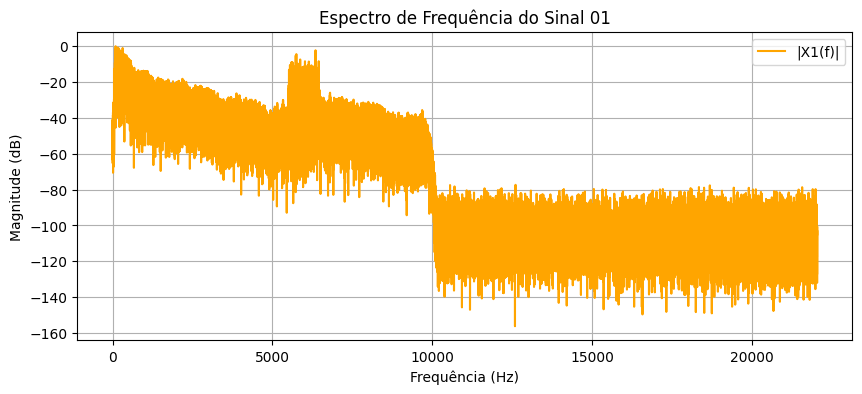

In [83]:
# Frequência do sinal e espectro em dB do sinal 1
frequencia_sinal_1, spectro_sinal_1_db = spectrum(sinal_1, taxa_amostragem_1)

# Plotando o espectro de frequência do sinal 1
plt.figure(figsize=(10, 4))
plt.plot(frequencia_sinal_1, spectro_sinal_1_db, label="|X1(f)|", color='orange')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Espectro de Frequência do Sinal 01")
plt.legend()
plt.grid()
plt.show()

### Leitura e plotagem do segundo sinal de áudio


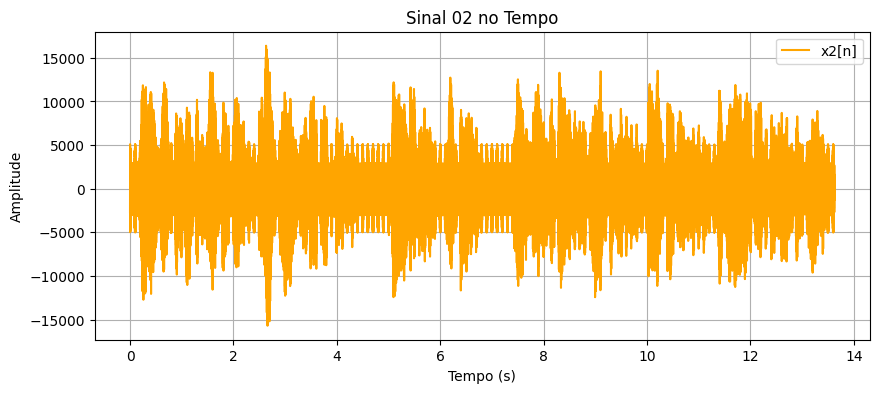

In [84]:
# Leitura do sinal 2
taxa_amostragem_2, sinal_2 = wav.read(f'{caminho_arquivos}/02.wav')

# Tempo do sinal 2
duracao2 = len(sinal_2) / taxa_amostragem_2
tempo2 = np.linspace(0, duracao2, len(sinal_2), endpoint=False)

# Plotando o sinal 2 no tempo
plt.figure(figsize=(10, 4))
plt.plot(tempo2, sinal_2, label="x2[n]", color='orange')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Sinal 02 no Tempo")
plt.legend()
plt.grid()
plt.show()

### Análise de frequência do segundo sinal


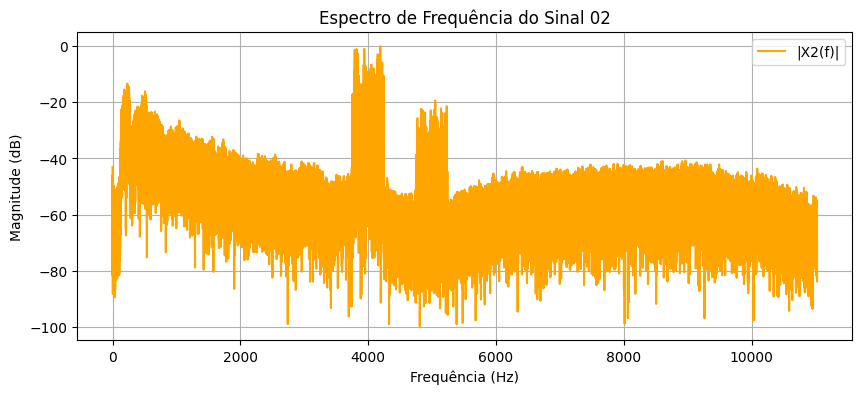

In [85]:
# Frequência do sinal e espectro em dB do sinal 1
frequencia_sinal_2, spectro_sinal_2_db = spectrum(sinal_2, taxa_amostragem_2)

# Plotando o espectro de frequência do sinal 1
plt.figure(figsize=(10, 4))
plt.plot(frequencia_sinal_2, spectro_sinal_2_db, label="|X2(f)|", color='orange')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Espectro de Frequência do Sinal 02")
plt.legend()
plt.grid()
plt.show()

### Criação dos filtros FIR

In [86]:
# Parâmetros do filtro
# fc -> frequência de corte em Hz
# L -> número de coeficientes do filtro
fc1, L1 = 5100, 201
fc2, L2 = 3500, 301

# Criando os filtros FIR
h1 = create_fir(fc1, L1, taxa_amostragem_1)
h2 = create_fir(fc2, L2, taxa_amostragem_2)

### Análise da resposta dos filtros


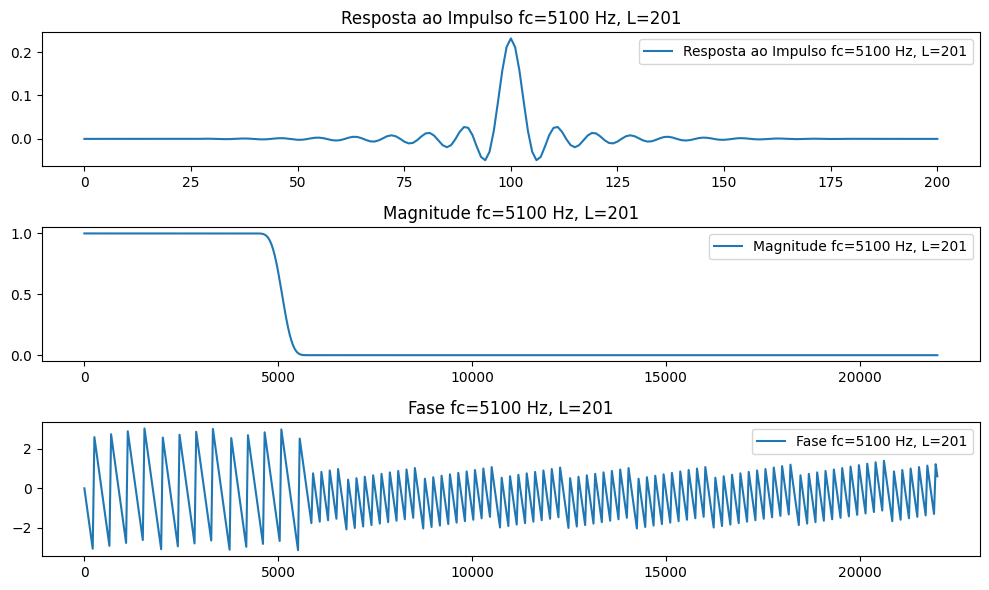

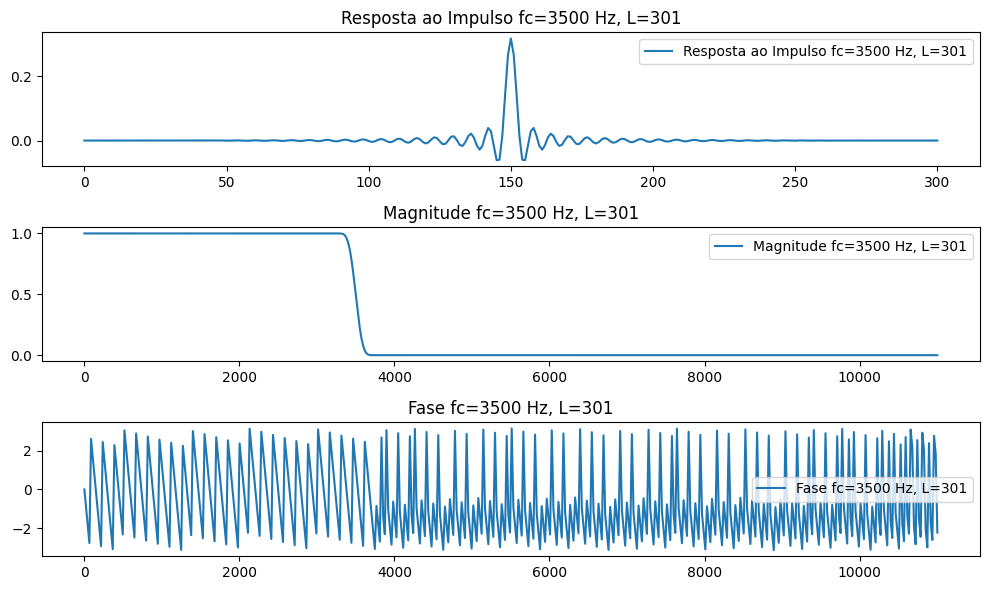

In [87]:
# Resposta ao impulso, magnitude e fase do filtro
def plot_filter_response(h, fs, label):
    # h -> coeficientes do filtro
    # fs -> taxa de amostragem do filtro
    # label -> rótulo para o gráfico

    plt.figure(figsize=(10, 6))
    plt.subplot(3, 1, 1)
    plt.plot(h, label=f"Resposta ao Impulso {label}")
    plt.title(f"Resposta ao Impulso {label}")
    plt.legend()

    H = np.fft.fft(h, 1024)
    freqs = np.fft.fftfreq(1024, 1/fs)[:512]
    plt.subplot(3, 1, 2)
    plt.plot(freqs, np.abs(H[:512]), label=f"Magnitude {label}")
    plt.title(f"Magnitude {label}")
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(freqs, np.angle(H[:512]), label=f"Fase {label}")
    plt.title(f"Fase {label}")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_filter_response(h1, taxa_amostragem_1, f"fc={fc1} Hz, L={L1}")
plot_filter_response(h2, taxa_amostragem_2, f"fc={fc2} Hz, L={L2}")

### Aplicação dos filtros aos sinais


In [88]:
# Aplicando os filtros
sinal_1_filtrado = convolve(sinal_1, h1)
sinal_2_filtrado = convolve(sinal_2, h2)


### Visualização dos sinais filtrados no tempo


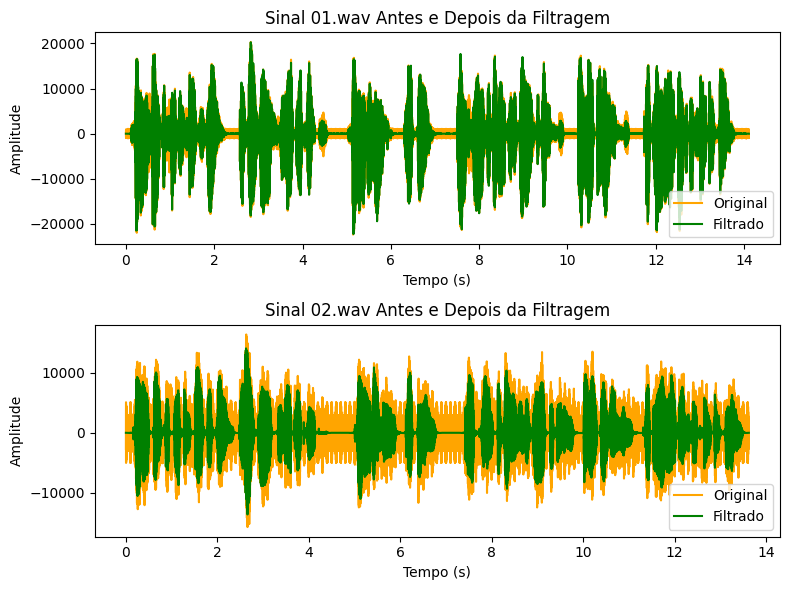

In [89]:
# Plotando sinais filtrados no tempo

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(tempo1, sinal_1, label='Original', color='orange')
plt.plot(tempo1, sinal_1_filtrado, label='Filtrado', color='g')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Sinal 01.wav Antes e Depois da Filtragem")

plt.subplot(2, 1, 2)
plt.plot(tempo2, sinal_2, label='Original', color='orange')
plt.plot(tempo2, sinal_2_filtrado, label='Filtrado', color='g')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Sinal 02.wav Antes e Depois da Filtragem")
plt.tight_layout()
plt.show()

### Análise de frequência dos sinais filtrados


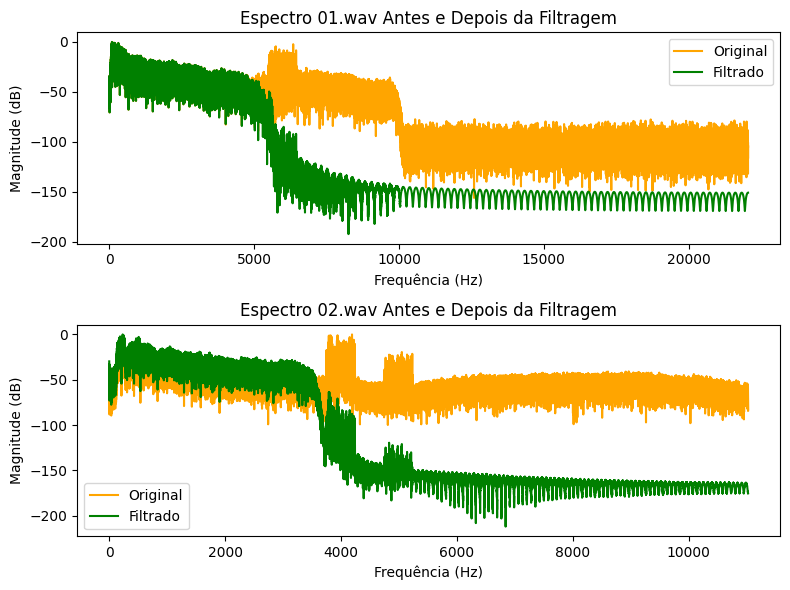

In [90]:
# Plotando sinal filtrado na freqûencia
freq_filt_1, spectro_filt_1 = spectrum(sinal_1_filtrado, taxa_amostragem_1)
freq_filt_2, spectro_filt_2 = spectrum(sinal_2_filtrado, taxa_amostragem_2)


plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencia_sinal_1, spectro_sinal_1_db, label='Original', color='orange')
plt.plot(freq_filt_1, spectro_filt_1, label='Filtrado', color='g')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.title("Espectro 01.wav Antes e Depois da Filtragem")

plt.subplot(2, 1, 2)
plt.plot(frequencia_sinal_2, spectro_sinal_2_db, label='Original', color='orange')
plt.plot(freq_filt_2, spectro_filt_2, label='Filtrado', color='g')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.title("Espectro 02.wav Antes e Depois da Filtragem")
plt.tight_layout()
plt.show()

### Reprodução dos sinais de áudio


In [91]:
print("Sinal Original 01.wav")
play(sinal_1, rate=taxa_amostragem_1)

Sinal Original 01.wav


In [92]:
print("Sinal Filtrado 01.wav")
play(sinal_1_filtrado, rate=taxa_amostragem_1)

Sinal Filtrado 01.wav


In [93]:
print("Sinal Original 02.wav")
play(sinal_2, rate=taxa_amostragem_2)

Sinal Original 02.wav


In [94]:
print("Sinal Filtrado 02.wav")
play(sinal_2_filtrado, rate=taxa_amostragem_2)

Sinal Filtrado 02.wav


### Salvando os sinais de áudio filtrados


In [95]:
# Salvando os arquivos filtrados
wav.write("../resultados/filtrado_01.wav", taxa_amostragem_1, sinal_1_filtrado.astype(np.int16))
wav.write("../resultados/filtrado_02.wav", taxa_amostragem_2, sinal_2_filtrado.astype(np.int16))